Esse notebook foi utilizado para verificar os dados do experimento


Mobility: Se possui problema de mobilidade (0 -> não possui problema 4 -> incapacitado)

Care: Se possui dificuldade em se cuidar (0 -> não possui problema 4 -> incapacitado)

Active: Se possui dificuldade em fazer atividades cotidianas (0 -> não possui problema 4 -> incapacitado)

Pain: Se sente dor (0 -> não possui  4 -> incapacitado)

Work: Se você trabalha (0 -> Não; 1 -> Sim)

WorkActive: Seu trabalho requisitou alguma atividade? (1 -> atividade sentada, 2-> atividade sentada ou em pé, 3 -> Andando com materiais leves, 4 -> andando com materiais pesados)

----------------------------------------------------------------------------------------------

DepressionHx: Você possui depressão? (0 -> Não, 1 -> Sim, 3 -> NA)

DepressionHxTrt: Você recebe tratamento? (0 -> Não, 1 -> Sim)

DepressionHxLim: A depressão limita suas atividades?  (0 -> Não, 1 -> Sim)


In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [134]:
df = pd.read_csv("../data/processed/exp.csv").drop(["Unnamed: 0"], axis =1)

In [135]:
df

,age,Mobility,Care,Active,Pain,Work,WorkActive,DepressionHx,DepressionHxTrt,DepressionHxLim
0,82.1,1.0,0.0,1.0,1.0,0.0,-1.0,1.0,1.0,0.0
1,63.3,2.0,1.0,1.0,2.0,1.0,1.0,0.0,-1.0,-1.0
2,87.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
3,62.8,0.0,0.0,1.0,0.0,1.0,2.0,0.0,-1.0,-1.0
4,67.1,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
29378,64.6,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,-1.0
29379,62.1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0
29380,81.2,4.0,4.0,4.0,2.0,0.0,-1.0,1.0,1.0,0.0
29381,67.6,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,-1.0,-1.0


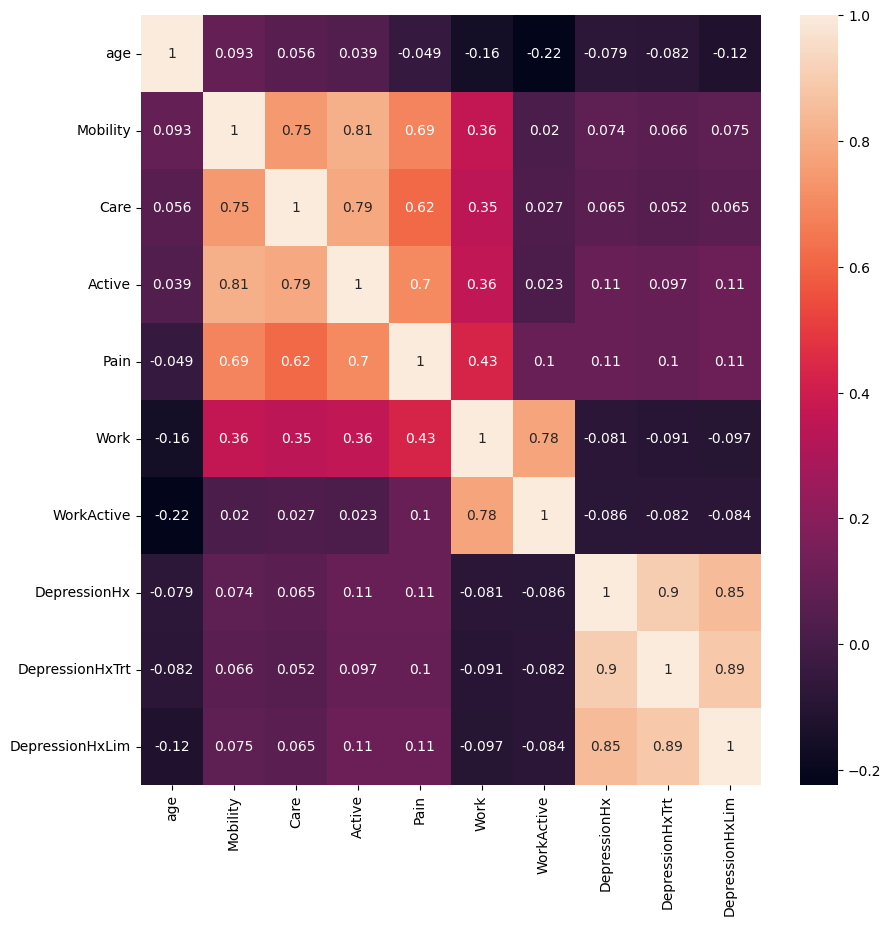

In [136]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=df.corr(),annot=True,)
#plt.savefig("../assets/heatmap/heatmap_" +str(i)+ ".jpg")
plt.show()

In [137]:
"""
Criando um histograma comparando com x sem depressão
"""
nao = df.query("DepressionHx == 0")
dep = df.query("DepressionHx == 1")


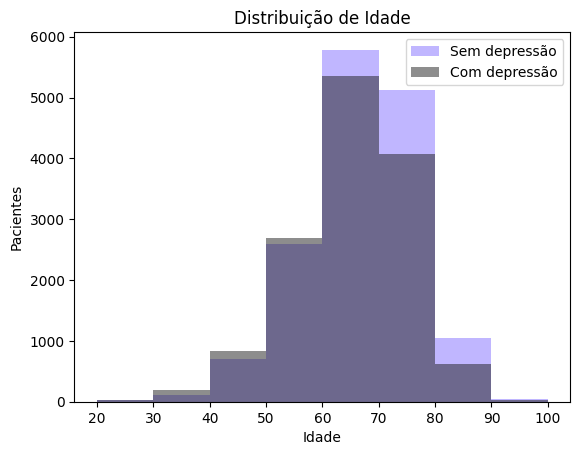

In [138]:
idade_nao = nao['age']
idade_com = dep['age']

plt.hist(idade_nao, bins=range(20, 110,10),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(idade_com, bins=range(20, 110,10),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Pacientes')
plt.legend(loc='upper right')
plt.savefig("../assets/exp/idade-semXcom.jpg", bbox_inches='tight')
plt.show()

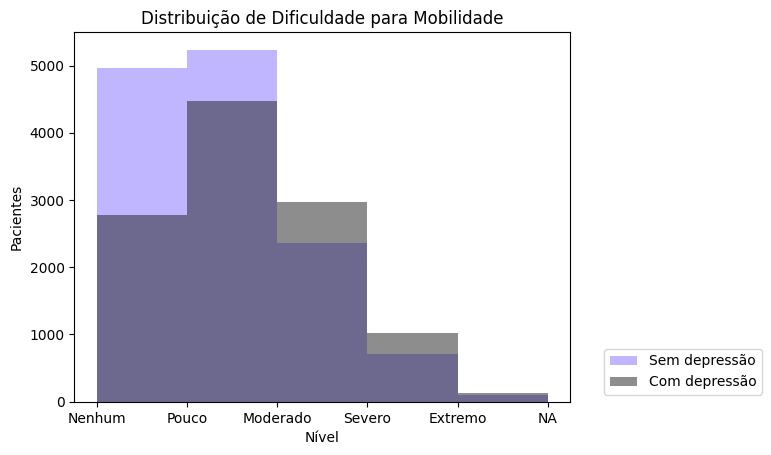

In [139]:
mob_nao = nao['Mobility']
mob_com = dep['Mobility']


legenda = {
    0 : 'Nenhum',
    1 : 'Pouco',
    2 : 'Moderado',
    3 : 'Severo',
	4 : 'Extremo',
	5 : 'NA'}

plt.hist(mob_nao, bins=range(0, 6,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(0, 6,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de Dificuldade para Mobilidade')
plt.xlabel('Nível')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(0,6), [legenda[val] for val in range(0,6)])
plt.savefig("../assets/exp/mob-semXcom.jpg", bbox_inches='tight')
plt.show()

In [140]:
df['Mobility'].value_counts()

 1.0    9720
 0.0    7762
 2.0    5334
-1.0    4585
 3.0    1739
 4.0     210
 5.0      33
Name: Mobility, dtype: int64

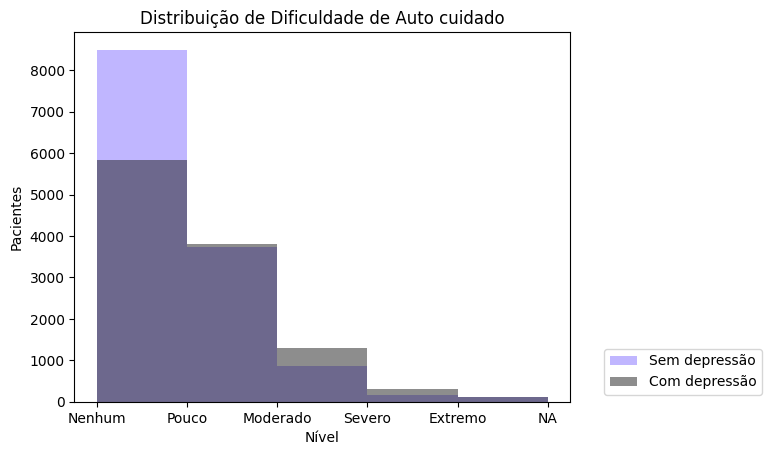

 0.0    14360
 1.0     7554
-1.0     4588
 2.0     2172
 3.0      459
 4.0      210
 5.0       40
Name: Care, dtype: int64

In [141]:
mob_nao = nao['Care']
mob_com = dep['Care']


legenda = {
    0 : 'Nenhum',
    1 : 'Pouco',
    2 : 'Moderado',
    3 : 'Severo',
	4 : 'Extremo',
	5 : 'NA'}

plt.hist(mob_nao, bins=range(0, 6,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(0, 6,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de Dificuldade de Auto cuidado')
plt.xlabel('Nível')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(0,6), [legenda[val] for val in range(0,6)])
plt.savefig("../assets/exp/care-semXcom.jpg", bbox_inches='tight')
plt.show()

df['Care'].value_counts()

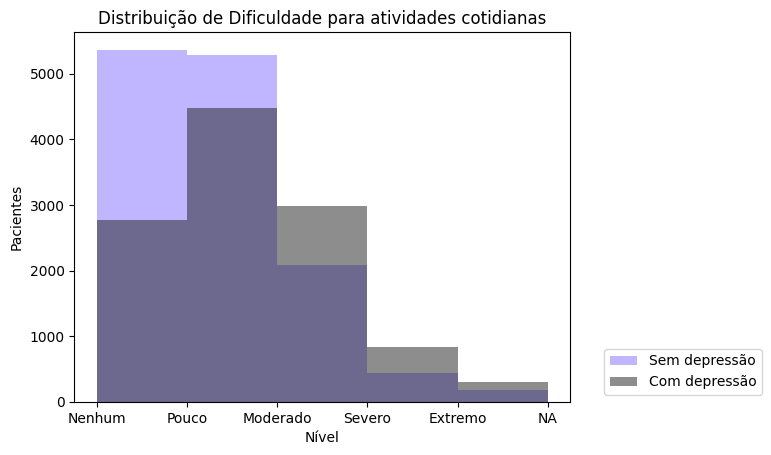

 1.0    9779
 0.0    8155
 2.0    5087
-1.0    4595
 3.0    1269
 4.0     457
 5.0      41
Name: Active, dtype: int64

In [142]:
mob_nao = nao['Active']
mob_com = dep['Active']


legenda = {
    0 : 'Nenhum',
    1 : 'Pouco',
    2 : 'Moderado',
    3 : 'Severo',
	4 : 'Extremo',
	5 : 'NA'}

plt.hist(mob_nao, bins=range(0, 6,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(0, 6,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de Dificuldade para atividades cotidianas')
plt.xlabel('Nível')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(0,6), [legenda[val] for val in range(0,6)])
plt.savefig("../assets/exp/act-semXcom.jpg")
plt.show()

df['Active'].value_counts()

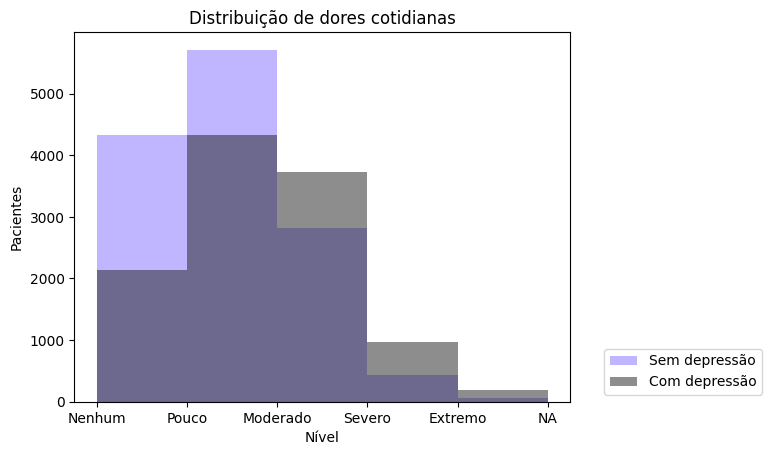

 1.0    10053
 2.0     6569
 0.0     6483
-1.0     4598
 3.0     1407
 4.0      230
 5.0       43
Name: Pain, dtype: int64

In [143]:
mob_nao = nao['Pain']
mob_com = dep['Pain']


legenda = {
    0 : 'Nenhum',
    1 : 'Pouco',
    2 : 'Moderado',
    3 : 'Severo',
	4 : 'Extremo',
	5 : 'NA'}

plt.hist(mob_nao, bins=range(0, 6,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(0, 6,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de dores cotidianas')
plt.xlabel('Nível')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(0,6), [legenda[val] for val in range(0,6)])
plt.savefig("../assets/exp/pain-semXcom.jpg", bbox_inches='tight')
plt.show()

df['Pain'].value_counts()

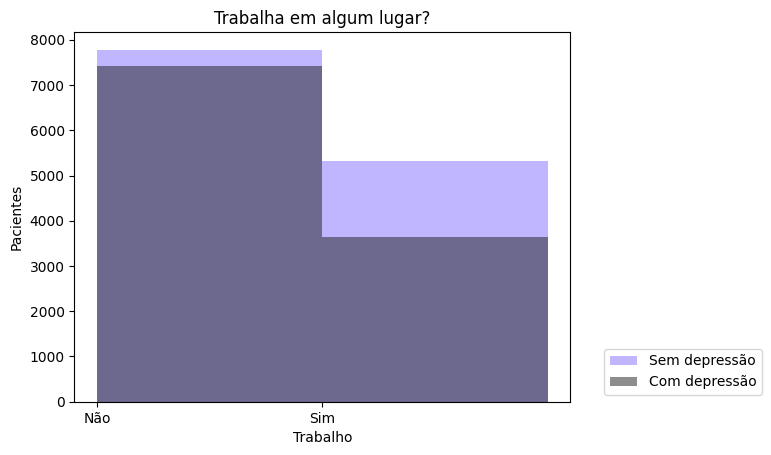

 0.0    15245
 1.0     8980
-1.0     5091
 3.0       67
Name: Work, dtype: int64

In [144]:
mob_nao = nao['Work']
mob_com = dep['Work']


legenda = {
    0 : 'Não',
    1 : 'Sim',
	}

plt.hist(mob_nao, bins=range(0, 3,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(0, 3,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Trabalha em algum lugar?')
plt.xlabel('Trabalho')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(0,2), [legenda[val] for val in range(0,2)])
plt.savefig("../assets/exp/work-semXcom.jpg", bbox_inches='tight')
plt.show()

df['Work'].value_counts()

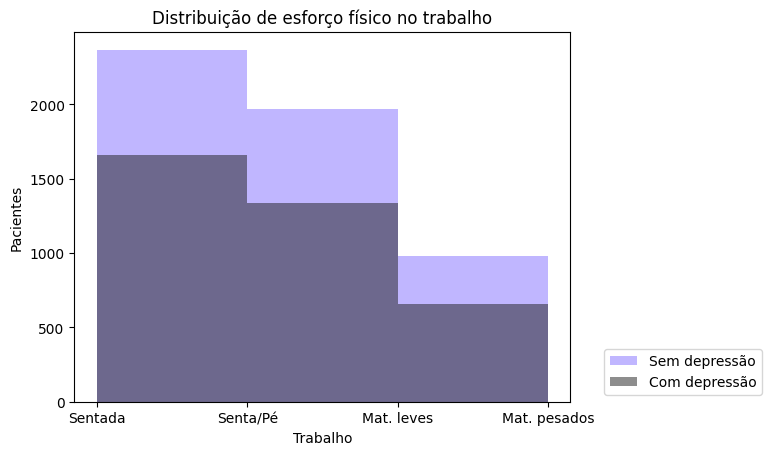

-1.0    20403
 1.0     4033
 2.0     3305
 3.0     1485
 4.0      157
Name: WorkActive, dtype: int64

In [145]:
mob_nao = nao['WorkActive']
mob_com = dep['WorkActive']


legenda = {
    1 : 'Sentada',
    2 : 'Senta/Pé',
    3 : 'Mat. leves',
	4 : 'Mat. pesados',
	}

plt.hist(mob_nao, bins=range(1, 5,1),
         label='Sem depressão', color='#836FFF', alpha=0.5)
plt.hist(mob_com, bins=range(1, 5,1),
         label='Com depressão', color='#1C1C1C', alpha=0.5)

plt.title('Distribuição de esforço físico no trabalho')
plt.xlabel('Trabalho')
plt.ylabel('Pacientes')
plt.legend( bbox_to_anchor=(1.4,0), loc='lower right')
plt.xticks(range(1,5), [legenda[val] for val in range(1,5)])
plt.savefig("../assets/exp/work-act-semXcom.jpg", bbox_inches='tight')
plt.show()

df['WorkActive'].value_counts()

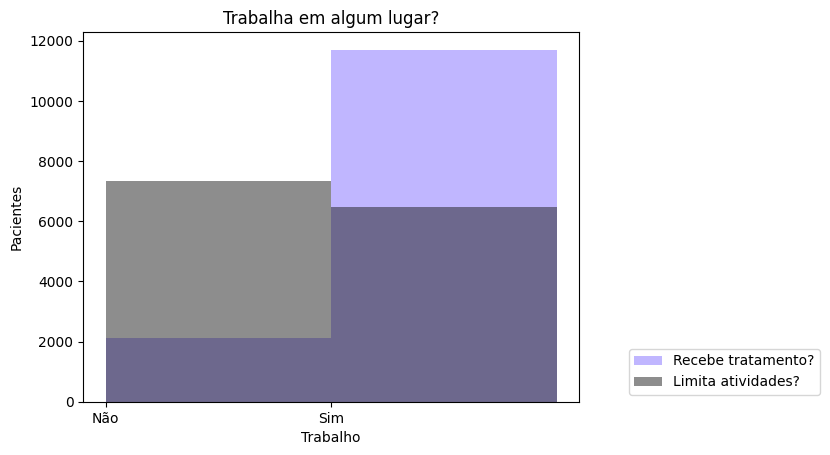

-1.0    15551
 1.0    11699
 0.0     2133
Name: DepressionHxTrt, dtype: int64

In [148]:
tratamento = dep['DepressionHxTrt']
limita = dep['DepressionHxLim']


legenda = {
    0 : 'Não',
    1 : 'Sim',
	}

plt.hist(tratamento, bins=range(0, 3,1),
         label='Recebe tratamento?', color='#836FFF', alpha=0.5)
plt.hist(limita, bins=range(0, 3,1),
         label='Limita atividades?', color='#1C1C1C', alpha=0.5)

plt.title('Trabalha em algum lugar?')
plt.xlabel('Trabalho')
plt.ylabel('Pacientes')
plt.legend(bbox_to_anchor=(1.5,0), loc='lower right')
plt.xticks(range(0,2), [legenda[val] for val in range(0,2)])
plt.savefig("../assets/exp/dep-semXcom.jpg", bbox_inches='tight')
plt.show()

df['DepressionHxTrt'].value_counts()

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29383 entries, 0 to 29382
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              29383 non-null  float64
 1   Mobility         29383 non-null  float64
 2   Care             29383 non-null  float64
 3   Active           29383 non-null  float64
 4   Pain             29383 non-null  float64
 5   Work             29383 non-null  float64
 6   WorkActive       29383 non-null  float64
 7   DepressionHx     29383 non-null  float64
 8   DepressionHxTrt  29383 non-null  float64
 9   DepressionHxLim  29383 non-null  float64
dtypes: float64(10)
memory usage: 2.2 MB


### Classificador simples

In [150]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

In [151]:
def report(X_val, y_val, model, name):
    
    print(f"Validação SVM")

    y_pred = model.predict(X_val)

    print(classification_report(y_val, y_pred))


    conf_matrix = confusion_matrix(y_val, y_pred)

    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot = True, ax = ax)

    ax.set_xlabel("Predicted") ; ax.set_ylabel("True");
    ax.set_title("Matriz de confusão")
    
    plt.savefig("../assets/exp/model"+name+".jpg", bbox_inches='tight')
    plt.show()

In [152]:
df.drop(["DepressionHxTrt","DepressionHxLim"], axis=1, inplace=True)

In [153]:
df['DepressionHx'].value_counts()

0.0    15440
1.0    13832
3.0      111
Name: DepressionHx, dtype: int64

In [154]:
df = df.query("DepressionHx != 3")

In [155]:
X_dados = df.iloc[:, 0:7].values
Y_dados = df.iloc[:, 7].values

In [156]:
## Separando dados de teste
X_train, X_test, y_train, y_test = train_test_split(X_dados, Y_dados, test_size = 0.2, random_state = 0)

## Separando em validação e treino
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

#### SVM

In [157]:
clf = svm.SVC().fit(X_train, y_train)

Validação SVM
              precision    recall  f1-score   support

         0.0       0.57      0.84      0.68      2486
         1.0       0.61      0.29      0.39      2198

    accuracy                           0.58      4684
   macro avg       0.59      0.56      0.54      4684
weighted avg       0.59      0.58      0.54      4684



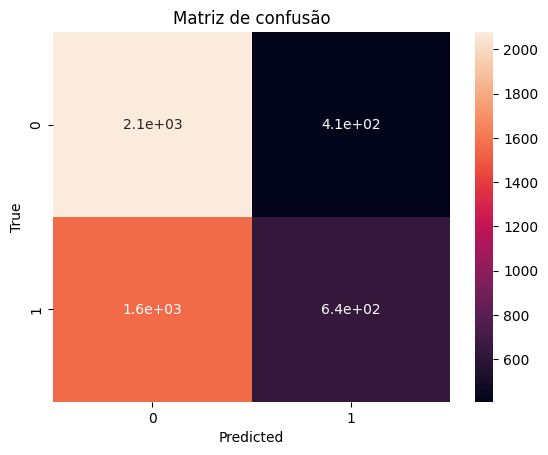

In [158]:
report(X_val, y_val, clf, "SVM")

In [159]:
filename = '../models/svm-1.sav'
pickle.dump(clf, open(filename, 'wb'))

### Regressão Logística

In [160]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs').fit(X_train, y_train)

filename = '../models/rl-1.sav'
pickle.dump(model, open(filename, 'wb'))

Validação SVM
              precision    recall  f1-score   support

         0.0       0.60      0.72      0.66      2486
         1.0       0.59      0.46      0.52      2198

    accuracy                           0.60      4684
   macro avg       0.60      0.59      0.59      4684
weighted avg       0.60      0.60      0.59      4684



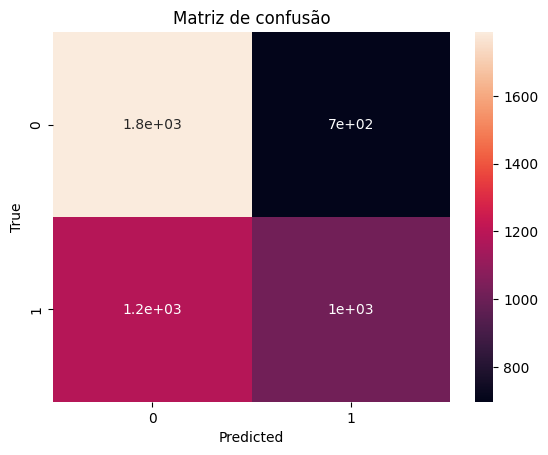

In [161]:
report(X_val, y_val, model, "RL")

### KNN

In [162]:
knn = KNeighborsClassifier().fit(X_train, y_train)

filename = '../models/knn-1.sav'
pickle.dump(knn, open(filename, 'wb'))

Validação SVM
              precision    recall  f1-score   support

         0.0       0.58      0.61      0.60      2486
         1.0       0.53      0.51      0.52      2198

    accuracy                           0.56      4684
   macro avg       0.56      0.56      0.56      4684
weighted avg       0.56      0.56      0.56      4684



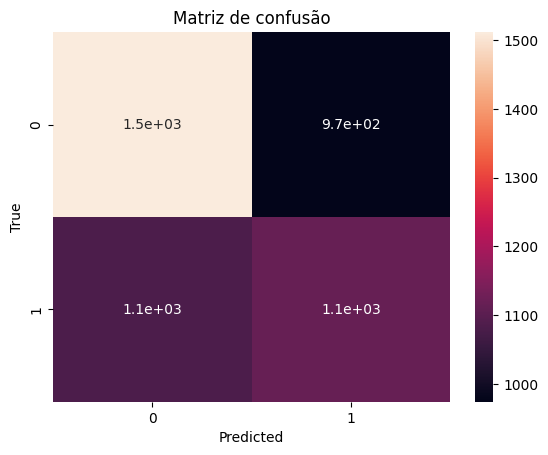

In [163]:
report(X_val, y_val, knn, "knn")

### Random Forest

In [164]:
rf = RandomForestClassifier().fit(X_train, y_train)

filename = '../models/rf-1.sav'
pickle.dump(rf, open(filename, 'wb'))

Validação SVM
              precision    recall  f1-score   support

         0.0       0.57      0.56      0.57      2486
         1.0       0.52      0.53      0.52      2198

    accuracy                           0.55      4684
   macro avg       0.54      0.54      0.54      4684
weighted avg       0.55      0.55      0.55      4684



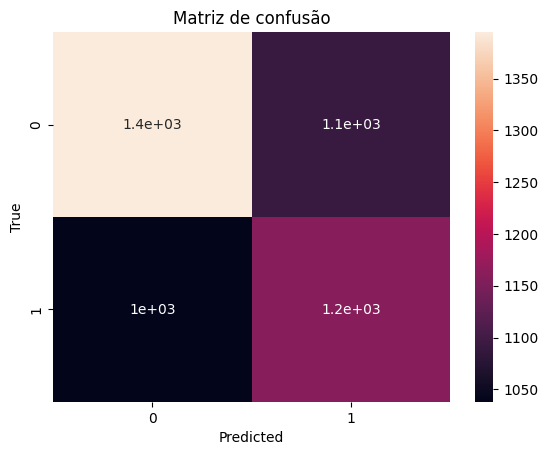

In [165]:
report(X_val, y_val, rf, "rf")